In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import datetime
pd.set_option("display.precision", 3)

In [6]:
folderToOpen = Path("../Datasets/")
fileName = "InsectLightTrap.csv"
filePath = folderToOpen / fileName
df_InsectTrap = pd.read_csv(filePath, parse_dates = ['date1', 'date2'], encoding = "latin1")

Everything loaded all right, what's in the dataset?

In [7]:
df_InsectTrap.dtypes

order                  object
family                 object
name                   object
year                    int64
date1          datetime64[ns]
date2          datetime64[ns]
individuals             int64
dtype: object

In [4]:
df_InsectTrap.count()

order          44088
family         44088
name           44088
year           44088
date1          44088
date2          44088
individuals    44088
dtype: int64

In [5]:
df_InsectTrap.head(5)

,order,family,name,year,date1,date2,individuals
0,LEPIDOPTERA,ACROLEPIIDAE,Acrolepiopsis assectella Zell.,1994,8/12/94,8/21/94,1
1,LEPIDOPTERA,ACROLEPIIDAE,Acrolepiopsis assectella Zell.,1994,8/22/94,8/25/94,1
2,LEPIDOPTERA,ACROLEPIIDAE,Acrolepiopsis assectella Zell.,1996,7/24/96,7/25/96,1
3,LEPIDOPTERA,ACROLEPIIDAE,Acrolepiopsis assectella Zell.,1998,7/13/98,7/19/98,1
4,LEPIDOPTERA,ACROLEPIIDAE,Acrolepiopsis assectella Zell.,1999,8/9/99,8/10/99,1


In [11]:
time_delta = df_InsectTrap.date1[1]-df_InsectTrap.date2[1]

In [28]:
seriesDays= (df_InsectTrap.date2-df_InsectTrap.date1).apply(lambda x: x/np.timedelta64(1,'D'))

In [32]:
df_InsectTrap['Days'] = seriesDays

In [35]:
df_InsectTrap.head(5)

,order,family,name,year,date1,date2,individuals,Days,indPerDay
0,LEPIDOPTERA,ACROLEPIIDAE,Acrolepiopsis assectella Zell.,1994,1994-08-12,1994-08-21,1,9.0,0.111
1,LEPIDOPTERA,ACROLEPIIDAE,Acrolepiopsis assectella Zell.,1994,1994-08-22,1994-08-25,1,3.0,0.333
2,LEPIDOPTERA,ACROLEPIIDAE,Acrolepiopsis assectella Zell.,1996,1996-07-24,1996-07-25,1,1.0,1.000
3,LEPIDOPTERA,ACROLEPIIDAE,Acrolepiopsis assectella Zell.,1998,1998-07-13,1998-07-19,1,6.0,0.167
4,LEPIDOPTERA,ACROLEPIIDAE,Acrolepiopsis assectella Zell.,1999,1999-08-09,1999-08-10,1,1.0,1.000


In [46]:
df_InsectTrap['indPerDay'] = df_InsectTrap.individuals / (df_InsectTrap.Days+1)

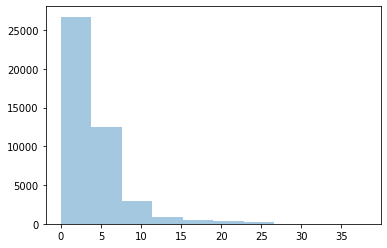

In [37]:
sns.distplot(df_InsectTrap.Days, kde = False, bins = 10)

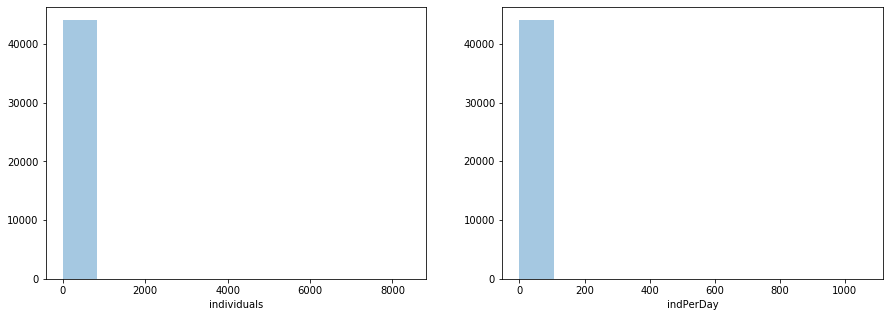

In [49]:
plt.figure(figsize = [15,5])
plt.subplot(121)

sns.distplot(df_InsectTrap.individuals, kde = False, bins = 10)

plt.subplot(122)

sns.distplot(df_InsectTrap.indPerDay, kde = False, bins = 10)

In [43]:
df_InsectTrap.dtypes

order                  object
family                 object
name                   object
year                    int64
date1          datetime64[ns]
date2          datetime64[ns]
individuals             int64
Days                  float64
indPerDay             float64
dtype: object

In [47]:
df_InsectTrap.indPerDay

0        0.100
1        0.250
2        0.500
3        0.143
4        0.500
5        0.500
6        0.333
7        0.100
8        0.500
9        0.143
10       0.125
11       0.040
12       0.400
13       0.375
14       0.304
15       0.800
16       0.143
17       1.000
18       0.125
19       0.333
20       0.167
21       0.100
22       0.048
23       0.091
24       0.167
25       0.083
26       0.048
27       0.045
28       0.200
29       0.036
         ...  
44058    1.000
44059    0.250
44060    0.200
44061    0.500
44062    0.500
44063    0.143
44064    0.250
44065    0.250
44066    2.667
44067    0.500
44068    0.333
44069    0.100
44070    0.500
44071    0.333
44072    0.500
44073    0.500
44074    0.111
44075    0.500
44076    0.250
44077    0.182
44078    0.333
44079    0.429
44080    0.429
44081    0.333
44082    0.143
44083    0.167
44084    0.167
44085    0.200
44086    0.333
44087    0.500
Name: indPerDay, Length: 44088, dtype: float64

In [50]:
df_InsectTrap.indPerDay.describe()

count    44088.000
mean         1.597
std         12.036
min          0.026
25%          0.250
50%          0.400
75%          1.000
max       1062.500
Name: indPerDay, dtype: float64

In [51]:
df_InsectTrap.individuals.describe()

count    44088.000
mean         5.714
std         59.735
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       8396.000
Name: individuals, dtype: float64

In [53]:
df_InsectTrap.individuals.sort_values(ascending = False)

36977    8396
36612    4872
36613    3543
36611    3174
36531    3074
36578    2125
23644    1656
36592    1284
43045    1281
36567    1131
36577    1000
36532     938
36545     919
36596     839
23642     827
36544     767
43076     754
36883     735
43113     675
21002     642
36533     633
38467     592
36615     571
36566     557
36590     521
43077     520
36600     501
36978     487
10969     467
36589     458
         ... 
25339       1
25301       1
25300       1
25299       1
25267       1
25193       1
25206       1
25207       1
25209       1
25227       1
25236       1
25245       1
25246       1
25248       1
25257       1
25259       1
25269       1
25298       1
25275       1
25279       1
25280       1
25281       1
25282       1
25283       1
25288       1
25289       1
25290       1
25291       1
25297       1
0           1
Name: individuals, Length: 44088, dtype: int64

In [61]:
df_InsectTrap.iloc[36977]

order                    LEPIDOPTERA
family                 YPONOMEUTIDAE
name           Yponomeuta padella L.
year                            2009
date1            2009-07-11 00:00:00
date2            2009-07-20 00:00:00
individuals                     8396
Days                               9
indPerDay                        840
Name: 36977, dtype: object